# Customer Support on Twitter

In [ ]:
import pandas as pd
import numpy as np
import string
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!unzip "/content/drive/MyDrive/twcs.zip" -d "/content/drive/MyDrive/MTL782"

unzip:  cannot find or open /content/drive/MyDrive/twcs.zip, /content/drive/MyDrive/twcs.zip.zip or /content/drive/MyDrive/twcs.zip.ZIP.


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/MTL782/twcs.csv")

In [ ]:
df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


In [ ]:
print(df.shape)
print()

print(df.info())
print()

print(df.isna().sum())

(2811774, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811774 entries, 0 to 2811773
Data columns (total 7 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tweet_id                 int64  
 1   author_id                object 
 2   inbound                  bool   
 3   created_at               object 
 4   text                     object 
 5   response_tweet_id        object 
 6   in_response_to_tweet_id  float64
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 131.4+ MB
None

tweet_id                         0
author_id                        0
inbound                          0
created_at                       0
text                             0
response_tweet_id          1040629
in_response_to_tweet_id     794335
dtype: int64


In [ ]:
df_ = df.drop(["response_tweet_id", "in_response_to_tweet_id"], axis=1)
df_.shape

(2811774, 5)

In [ ]:
# Run this to process entire data

df_ = df_.reset_index(drop=True)
inbound = df_[["inbound"]]

# Run this to preserve tweet_id column
df_ = df_.drop(['author_id', 'created_at', 'inbound'], axis = 1)


# Run this otherwise
# df_ = df_.drop(['tweet_id', 'author_id', 'created_at', 'inbound'], axis = 1)

df_.head()

,tweet_id,text
0,1,@115712 I understand. I would like to assist y...
1,2,@sprintcare and how do you propose we do that
2,3,@sprintcare I have sent several private messag...
3,4,@115712 Please send us a Private Message so th...
4,5,@sprintcare I did.


In [ ]:
# Run this to process sample

df_ = df_.sample(10000, random_state=42)
print(df_.shape)

df_ = df_.reset_index(drop=True)
inbound = df_[["inbound"]]

df_ = df_.drop(['tweet_id', 'author_id', 'created_at', 'inbound'], axis = 1)

df_.head()

(10000, 5)


,text
0,@161252 What's that egg website people talk about
1,Why!🤷🏻‍♀️ #iOS11 @AppleSupport https://t.co/BX...
2,@693975 We can assist you. We recommend updati...
3,@331912 @115955 Thats better than having an un...
4,@VirginAmerica is probably one of the best air...


## Text Preprocessing


### Lower Casing
Use with care. Lower casing may lead to loss of data in *sentiment analysis*.

In [ ]:
df_["new_text"] = df_["text"].str.lower()

df_sentiment = df_
df_ = df_.drop(["text"], axis=1)

df_.head()

,tweet_id,new_text
0,1,@115712 i understand. i would like to assist y...
1,2,@sprintcare and how do you propose we do that
2,3,@sprintcare i have sent several private messag...
3,4,@115712 please send us a private message so th...
4,5,@sprintcare i did.


### Punctuation removal
Choose carefully which punctuations are to be removed.

In [ ]:
# Run this to process entire data

punctuations = string.punctuation

def removing_punctuations(text):
  new_text = text.translate(str.maketrans("", "", punctuations))
  return new_text

df_["new_text"] = df_["new_text"].apply(lambda text: removing_punctuations(text))

df_.head()

,tweet_id,new_text
0,1,115712 i understand i would like to assist you...
1,2,sprintcare and how do you propose we do that
2,3,sprintcare i have sent several private message...
3,4,115712 please send us a private message so tha...
4,5,sprintcare i did


In [ ]:
# Run this to process a sample (Actually run this if lower casing has been performed)

punctuations = string.punctuation

def removing_punctuations(text):
  new_text = text.translate(str.maketrans("", "", punctuations))
  return new_text

df_["new_text"] = df_["new_text"].apply(lambda text: removing_punctuations(text))

df_.head()

### Removal of stopwords (English)
For **Parts of Speech (POS)** tagging usecase, do not remove these.

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('words')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
from nltk.corpus import stopwords
", ".join(stopwords.words("english"))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [ ]:
from nltk.tokenize import word_tokenize

stpwords = set(stopwords.words("english"))

def remove_stopwords(text):
  word_tokens = word_tokenize(text)
  filtered_words = [w for w in word_tokens if not w in stpwords]
  new_text = " ".join(filtered_words)
  return new_text

df_["new_text"] = df_["new_text"].apply(lambda text: remove_stopwords(text))

df_.head()

,tweet_id,new_text
0,1,115712 understand would like assist would need...
1,2,sprintcare propose
2,3,sprintcare sent several private messages one r...
3,4,115712 please send us private message assist c...
4,5,sprintcare


### Removal of frequent words


In [ ]:
from collections import Counter
counter = Counter()

for text in df_["new_text"].values:
  for word in text.split():
    counter[word] += 1

counter.most_common(20)

[('us', 451382),
 ('please', 402798),
 ('’', 381922),
 ('dm', 336639),
 ('help', 267815),
 ('hi', 224631),
 ('thanks', 206490),
 ('get', 200457),
 ('sorry', 192552),
 ('like', 146400),
 ('know', 145459),
 ('look', 139645),
 ('send', 138946),
 ('amazonhelp', 137277),
 ('well', 134062),
 ('service', 133896),
 ('im', 131559),
 ('number', 123490),
 ('account', 120183),
 ('email', 116907)]

In [ ]:
frequent_words = [w for (w,wc) in counter.most_common(10)]

print(frequent_words)

def remove_freq_words(text):
  word_tokens = word_tokenize(text)
  filtered_words = [w for w in word_tokens if not w in frequent_words]
  new_text = " ".join(filtered_words)
  return new_text

df_['new_text'] = df_['new_text'].apply(lambda text: remove_freq_words(text))

['us', 'please', '’', 'dm', 'help', 'hi', 'thanks', 'get', 'sorry', 'like']


In [ ]:
df_.head()

,tweet_id,new_text
0,1,115712 understand would like assist would need...
1,2,sprintcare propose
2,3,sprintcare sent several private messages one r...
3,4,115712 please send us private message assist c...
4,5,sprintcare


### Removal of very rare words
Be careful while removing words as some emojis, emoticons may also be lost which can cause loss of data while doing **Sentiment Analysis**.

In [ ]:
from collections import Counter
counter = Counter()

for text in df_["new_text"].values:
  for word in text.split():
    counter[word] += 1

counter = dict(counter)

print("Occurence of original number of words: ", len(counter.keys()))

less_than_1  = {}
more_than_1 = {}

for key, value in counter.items():
  if value < 2:
    less_than_1.update({key:value})
  else:
    more_than_1.update({key:value})

print("Words occured only a single time: ", len(less_than_1.keys()))
print("Words occured more than once: ", len(more_than_1.keys()))

words_remove = list(less_than_1.keys())

def remove_rarewords(text):
  tokens = word_tokenize(text)
  filtered_words = [w for w in tokens if not w in words_remove]
  new_text = " ".join(filtered_words)
  return new_text

df_["method1_text"] = df_["new_text"].apply(lambda text: remove_rarewords(text))

df_.head()

Occurence of original number of words:  21699
Words occured only a single time:  15259
Words occured more than once:  6440


,new_text,method1_text
0,161252 whats egg website people talk,whats egg website people talk
1,why🤷🏻‍♀️ ios11 applesupport httpstcobxrvfeixxq,ios11 applesupport
2,693975 assist recommend updating ios 1111 have...,assist recommend updating ios 1111 havent chan...
3,331912 115955 thats better unstable connection...,115955 thats better connection drops every mins
4,virginamerica probably one best airlines ive e...,virginamerica probably one best airlines ive e...


In [ ]:
from collections import Counter
counter = Counter()

for text in df_["new_text"].values:
  for word in text.split():
    counter[word] += 1

n_rare_words = 10

RARE = set([w for (w,wc) in counter.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords_alter(text):
  new_text = " ".join([word for word in str(text).split() if word not in RARE])
  return new_text

df_["method2_text"] = df_["new_text"].apply(lambda text: remove_rarewords_alter(text))
df_.head()

,tweet_id,new_text,method2_text
0,1,115712 understand would assist would need priv...,115712 understand would assist would need priv...
1,2,sprintcare propose,sprintcare propose
2,3,sprintcare sent several private messages one r...,sprintcare sent several private messages one r...
3,4,115712 send private message assist click ‘ mes...,115712 send private message assist click ‘ mes...
4,5,sprintcare,sprintcare


### Stemming
* Infected (or sometimes derived words) are reduced to their word stem, base root form.
* Effectively extra words with the same meaning, but different grammatical form are replaced (*stemmed*) to the simpler base word.
* **Lemmatization** needs to be done later.
* Porter stemmer from the nltk package is used.

In [ ]:
#df_ = df_.drop(["new_text", "method1_text"], axis = 1)

from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

def stem_words(text):
  tokens = text.split()
  new_tokens = [stemmer.stem(word) for word in tokens]
  new_text = " ".join(new_tokens)
  return new_text

df_["stem_text"] = df_["method2_text"].apply(lambda text: stem_words(text))

df_.head()

,tweet_id,new_text,method2_text,stem_text
0,1,115712 understand would assist would need priv...,115712 understand would assist would need priv...,115712 understand would assist would need priv...
1,2,sprintcare propose,sprintcare propose,sprintcar propos
2,3,sprintcare sent several private messages one r...,sprintcare sent several private messages one r...,sprintcar sent sever privat messag one respond...
3,4,115712 send private message assist click ‘ mes...,115712 send private message assist click ‘ mes...,115712 send privat messag assist click ‘ messa...
4,5,sprintcare,sprintcare,sprintcar


### Lemmatization
* Similar to stemming but ensures that the root word (stemmed word or lemma) belongs to the language
* Slower than stemming
* **WordNetLemmatizer** shall be used

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_sentences(text):
  tokens = text.split()
  new_tokens = [lemmatizer.lemmatize(word) for word in tokens]
  new_text = " ".join(new_tokens)
  return new_text

df_["lemmatize1_sent"] = df_["method2_text"].apply(lambda text: lemmatize_sentences(text))

df_.head()

,tweet_id,new_text,method2_text,stem_text,lemmatize1_sent
0,1,115712 understand would assist would need priv...,115712 understand would assist would need priv...,115712 understand would assist would need priv...,115712 understand would assist would need priv...
1,2,sprintcare propose,sprintcare propose,sprintcar propos,sprintcare propose
2,3,sprintcare sent several private messages one r...,sprintcare sent several private messages one r...,sprintcar sent sever privat messag one respond...,sprintcare sent several private message one re...
3,4,115712 send private message assist click ‘ mes...,115712 send private message assist click ‘ mes...,115712 send privat messag assist click ‘ messa...,115712 send private message assist click ‘ mes...
4,5,sprintcare,sprintcare,sprintcar,sprintcare


In [ ]:
a = df_["method2_text"][2]

[nltk.pos_tag([word]) for word in a.split()]

[[('sprintcare', 'NN')],
 [('sent', 'NN')],
 [('several', 'JJ')],
 [('private', 'JJ')],
 [('messages', 'NNS')],
 [('one', 'CD')],
 [('responding', 'VBG')],
 [('usual', 'JJ')]]

In [ ]:
[nltk.pos_tag([word])[0][1].upper() for word in a.split()]

['NN', 'NN', 'JJ', 'JJ', 'NNS', 'CD', 'VBG', 'JJ']

In [ ]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(word):
  tag = nltk.pos_tag([word])[0][1][0].upper()
  tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
  return tag_dict.get(tag, wordnet.NOUN)

def wordnet_pos_lemmatizer(text):
  tokens = text.split()
  new_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens]
  new_text = " ".join(new_tokens)
  return new_text

df_["lemmatize2_sent"] = df_["method2_text"].apply(lambda text: wordnet_pos_lemmatizer(text))

df_.head()

,tweet_id,new_text,method2_text,stem_text,lemmatize1_sent,lemmatize2_sent
0,1,115712 understand would assist would need priv...,115712 understand would assist would need priv...,115712 understand would assist would need priv...,115712 understand would assist would need priv...,115712 understand would assist would need priv...
1,2,sprintcare propose,sprintcare propose,sprintcar propos,sprintcare propose,sprintcare propose
2,3,sprintcare sent several private messages one r...,sprintcare sent several private messages one r...,sprintcar sent sever privat messag one respond...,sprintcare sent several private message one re...,sprintcare sent several private message one re...
3,4,115712 send private message assist click ‘ mes...,115712 send private message assist click ‘ mes...,115712 send privat messag assist click ‘ messa...,115712 send private message assist click ‘ mes...,115712 send private message assist click ‘ mes...
4,5,sprintcare,sprintcare,sprintcar,sprintcare,sprintcare


In [ ]:
df_save = df_.drop(["new_text", "method2_text", "stem_text", "lemmatize1_sent"], axis=1)
df_save.to_csv("/content/drive/MyDrive/MTL782/cleaned.csv", header=False)

### Removal of Emojis
Emojis indicate strong emotions and should not be removed while doing **Sentiment Analysis**.

Reference: [https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b](https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b)

In [ ]:
try:
  df_ = df_.drop(["new_text", "method2_text", "stem_text", "lemmatize1_sent"], axis = 1)
  df_.columns = ["text"]
except:
    pass

import re
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

sent1 = "game is on 🔥🔥"
sent2 = "Hilarious😂"

print(remove_emoji(sent1))
print(remove_emoji(sent2))

df_.head()

game is on 
Hilarious


,tweet_id,lemmatize2_sent
0,1,115712 understand would assist would need priv...
1,2,sprintcare propose
2,3,sprintcare sent several private message one re...
3,4,115712 send private message assist click ‘ mes...
4,5,sprintcare


In [ ]:
df_ = df_.rename(columns={"lemmatize2_sent":"text"})

In [ ]:
df_["without_emoji_text"] = df_["text"].apply(lambda text: remove_emoji(text))

df_.head()

,tweet_id,text,without_emoji_text
0,1,115712 understand would assist would need priv...,115712 understand would assist would need priv...
1,2,sprintcare propose,sprintcare propose
2,3,sprintcare sent several private message one re...,sprintcare sent several private message one re...
3,4,115712 send private message assist click ‘ mes...,115712 send private message assist click ‘ mes...
4,5,sprintcare,sprintcare


In [ ]:
df_["text"][1].split()

['sprintcare', 'propose']

### Removal of Emoticons
This is not recommended while performing **Sentiment Analysis**.

Reference: [https://github.com/NeelShah18/emot/blob/master/emot/emo_unicode.py](https://github.com/NeelShah18/emot/blob/master/emot/emo_unicode.py)

In [ ]:
import urllib.request
url = "https://raw.githubusercontent.com/NeelShah18/emot/master/emot/emo_unicode.py"
print ("download start!")
filename, headers = urllib.request.urlretrieve(url, filename="emo_unicode.py")
print ("download complete!")
print ("download file location: ", filename)
print ("download headers: ", headers)

download start!
download complete!
download file location:  emo_unicode.py
download headers:  Connection: close
Content-Length: 159798
Cache-Control: max-age=300
Content-Security-Policy: default-src 'none'; style-src 'unsafe-inline'; sandbox
Content-Type: text/plain; charset=utf-8
ETag: "3766f28b9a7a01d906936d2a024907f16d38aa1ae10d20e1a6e662b2bbfac90f"
Strict-Transport-Security: max-age=31536000
X-Content-Type-Options: nosniff
X-Frame-Options: deny
X-XSS-Protection: 1; mode=block
X-GitHub-Request-Id: 73CC:6CA3:3C1D7A:502E35:606870FD
Accept-Ranges: bytes
Date: Sat, 03 Apr 2021 13:43:25 GMT
Via: 1.1 varnish
X-Served-By: cache-hkg17923-HKG
X-Cache: MISS
X-Cache-Hits: 0
X-Timer: S1617457406.536506,VS0,VE311
Vary: Authorization,Accept-Encoding
Access-Control-Allow-Origin: *
X-Fastly-Request-ID: e3f83f6c5e571f2cee030481493b5e5097d2ec6d
Expires: Sat, 03 Apr 2021 13:48:25 GMT
Source-Age: 0




In [ ]:
from emo_unicode import EMOTICONS

In [ ]:
def remove_emoticons(text):
  emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
  return emoticon_pattern.sub(r'', text)

print(remove_emoticons("Hello :-)"))

Hello 


In [ ]:
df_["without_emoticons_text"] = df_["text"].apply(lambda text: remove_emoticons(text))

df_.head()

,text,without_emoji_text,without_emoticons_text
0,161252 whats egg website people talk,161252 whats egg website people talk,161252 whats egg website people talk
1,why🤷🏻‍♀️ ios11 applesupport httpstcobxrvfeixxq,why ios11 applesupport httpstcobxrvfeixxq,why🤷🏻‍♀️ ios11 applesupport httpstcobxrvfeixxq
2,693975 assist recommend update io 1111 havent ...,693975 assist recommend update io 1111 havent ...,693975 assist recommend update io 1111 havent ...
3,331912 115955 thats well unstable connection d...,331912 115955 thats well unstable connection d...,331912 115955 thats well unstable connection d...
4,virginamerica probably one best airline ive ev...,virginamerica probably one best airline ive ev...,virginamerica probably one best airline ive ev...


### Conversion of Emoticons to words
It is better to convert emoticons to words to prevent loss of emotion data.

In [ ]:
import re


In [ ]:
def convert_emoticons(text):
  for emot in EMOTICONS:
    text = re.sub(u'('+emot+')', "_".join(EMOTICONS[emot].replace(",", "").split()), text)
  return text

text = "Hello :-) :-)"
convert_emoticons(text)


'Hello Happy_face_smiley Happy_face_smiley'

In [ ]:
df_.head()

,tweet_id,text,without_emoji_text
0,1,115712 understand would assist would need priv...,115712 understand would assist would need priv...
1,2,sprintcare propose,sprintcare propose
2,3,sprintcare sent several private message one re...,sprintcare sent several private message one re...
3,4,115712 send private message assist click ‘ mes...,115712 send private message assist click ‘ mes...
4,5,sprintcare,sprintcare


In [ ]:
try:
  df_ = df_.drop(["without_emoji_text", "without_emoticons_text"], axis=1)
except:
  pass

df_['emoticons_converted_text'] = df_["text"].apply(lambda text: convert_emoticons(text))

df_.head()

,tweet_id,text,without_emoji_text,emoticons_converted_text
0,1,115712 understand would assist would need priv...,115712 understand would assist would need priv...,115712 understand would assist would need priv...
1,2,sprintcare propose,sprintcare propose,sprintcare propose
2,3,sprintcare sent several private message one re...,sprintcare sent several private message one re...,sprintcare sent several private message one re...
3,4,115712 send private message assist click ‘ mes...,115712 send private message assist click ‘ mes...,115712 send private message assist click ‘ mes...
4,5,sprintcare,sprintcare,sprintcare


### Conversion of Emojis to Words

In [ ]:
from emo_unicode import UNICODE_EMO

In [ ]:
def convert_emojis(text):
  for emot in UNICODE_EMO:
    # NOTE: There is some Python bug related to the use of '*' in regular expressions.
    try:
      text = re.sub(r'('+emot+')', "_".join(UNICODE_EMO[emot].replace(",","").replace(":","").split()), text)
    except:
      pass
  return text

text1 = "game is on 🔥"
print(convert_emojis(text1))

text2 = "Hilarious 😂"
print(convert_emojis(text2))

game is on fire
Hilarious face_with_tears_of_joy


In [ ]:
df_["emoji_converted_text"] = df_["emoticons_converted_text"].apply(lambda text: convert_emojis(text))
df_.head()

#### **NOTE:** There may be some ISSUE with the above method.

### Use of Regular Expressions for removal of URLs, HTML tags, Phone numbers, Email IDs etc



In [ ]:
def cleaning_text(text):

  # remove HTML tags
  text = re.sub(r'<.*?>', '', text)
  
  # removing [\], ['], ["]
  text = re.sub(r'\\', "", text)
  text = re.sub(r"\'", "", text)
  text = re.sub(r"\"", "", text)

  # removing dates with slashes
  text = re.sub("\d{1,2}\/\d{1,2}\/\d{2,4}", "", text)

  # removing dates with dashes
  text = re.sub("\d{1,2}-\d{1,2}-\d{2,4}", "", text)

  # removing URLs
  text = re.sub("((http:\/\/www\.)|(www\.)|(http:\/\/))[a-zA-Z0-9._-]+\.[a-zA-Z.]{2,5}", "", text)

  # removing email IDs from the text
  text = re.sub("\w+@[a-zA-Z_]+?\.[a-zA-Z]{2,3}", "", text)

  # replace punctuation characters with spaces
  filters='!"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
  translate_dict = dict((c, "") for c in filters)
  
  # print(translate_dict)
  translate_map = str.maketrans(translate_dict)
    
  # print(translate_map)
  text = text.translate(translate_map)
    
  return text


#### Case 1

In [ ]:
df_["cleaned_text"] = df_["emoticons_converted_text"].apply(lambda text: cleaning_text(text))
df_.head()

,tweet_id,text,without_emoji_text,emoticons_converted_text,cleaned_text
0,1,115712 understand would assist would need priv...,115712 understand would assist would need priv...,115712 understand would assist would need priv...,115712 understand would assist would need priv...
1,2,sprintcare propose,sprintcare propose,sprintcare propose,sprintcare propose
2,3,sprintcare sent several private message one re...,sprintcare sent several private message one re...,sprintcare sent several private message one re...,sprintcare sent several private message one re...
3,4,115712 send private message assist click ‘ mes...,115712 send private message assist click ‘ mes...,115712 send private message assist click ‘ mes...,115712 send private message assist click ‘ mes...
4,5,sprintcare,sprintcare,sprintcare,sprintcare


In [ ]:
try:
    df_ = df_.drop(["text", "emoticons_converted_text", "without_emoji_text"], axis = 1)
except: 
    pass 

df_.head()

,tweet_id,cleaned_text
0,1,115712 understand would assist would need priv...
1,2,sprintcare propose
2,3,sprintcare sent several private message one re...
3,4,115712 send private message assist click ‘ mes...
4,5,sprintcare


In [ ]:
df_.to_csv("/content/drive/MyDrive/MTL782/cleaned_ver2.csv", header=False)

#### Case 2

In [ ]:
df_["cleaned_text"] = df_["emoji_converted_text"].apply(lambda text: cleaning_text(text))
df_.head()

,text,emoticons_converted_text,emoji_converted_text,cleaned_text
0,161252 whats egg website people talk,161252 whats egg website people talk,161252 whats egg website people talk,161252 whats egg website people talk
1,why🤷🏻‍♀️ ios11 applesupport httpstcobxrvfeixxq,why🤷🏻‍♀️ ios11 applesupport httpstcobxrvfeixxq,whyperson_shrugginglight_skin_tone‍female_sign...,whypersonshrugginglightskintone‍femalesign️ io...
2,693975 assist recommend update io 1111 havent ...,693975 assist recommend update io 1111 havent ...,693975 assist recommend update io 1111 havent ...,693975 assist recommend update io 1111 havent ...
3,331912 115955 thats well unstable connection d...,331912 115955 thats well unstable connection d...,331912 115955 thats well unstable connection d...,331912 115955 thats well unstable connection d...
4,virginamerica probably one best airline ive ev...,virginamerica probably one best airline ive ev...,virginamerica probably one best airline ive ev...,virginamerica probably one best airline ive ev...


In [ ]:
try:
    df_ = df_.drop(["text", "emoticons_converted_text", "emoji_converted_text"], axis = 1)
except: 
    pass 

df_.head()

,cleaned_text
0,161252 whats egg website people talk
1,whypersonshrugginglightskintone‍femalesign️ io...
2,693975 assist recommend update io 1111 havent ...
3,331912 115955 thats well unstable connection d...
4,virginamerica probably one best airline ive ev...


### Chat Word Conversion
Slang words commonly used in chats are converted to proper English

#### **NOTE:** If you download the file again, then you'll have to change the lines that contain 'ILU' and 'QPSA'.

In [ ]:
import urllib.request
url = "https://raw.githubusercontent.com/rishabhverma17/sms_slang_translator/master/slang.txt"
print ("download start!")
filename, headers = urllib.request.urlretrieve(url, filename="slang.txt")
print ("download complete!")
print ("download file location: ", filename)
print ("download headers: ", headers)

download start!
download complete!
download file location:  slang.txt
download headers:  Connection: close
Content-Length: 1351
Cache-Control: max-age=300
Content-Security-Policy: default-src 'none'; style-src 'unsafe-inline'; sandbox
Content-Type: text/plain; charset=utf-8
ETag: "a79a6b2a6dd98e27d5eff59a76c6eab3dfc74b58a3482f28242f4f3231ade01f"
Strict-Transport-Security: max-age=31536000
X-Content-Type-Options: nosniff
X-Frame-Options: deny
X-XSS-Protection: 1; mode=block
X-GitHub-Request-Id: 10F8:44C0:22E208:295CF8:606879FF
Accept-Ranges: bytes
Date: Sat, 03 Apr 2021 14:21:51 GMT
Via: 1.1 varnish
X-Served-By: cache-hkg17920-HKG
X-Cache: MISS
X-Cache-Hits: 0
X-Timer: S1617459711.393113,VS0,VE339
Vary: Authorization,Accept-Encoding
Access-Control-Allow-Origin: *
X-Fastly-Request-ID: 1ab2366264c0d838ce5b637ac726561835bbb874
Expires: Sat, 03 Apr 2021 14:26:51 GMT
Source-Age: 0




In [ ]:
slang_file = open('slang.txt', mode='r')
chat_words_str = slang_file.read()
slang_file.close()

In [ ]:
chat_words_dict = {}

# making a dictionary from the info in the file
for line in chat_words_str.split("\n"):
  if line != "" :
    cw = line.split("=")[0]
    cw_full = line.split("=")[1]
    chat_words_dict.update({cw: cw_full})

abbreviated_words = chat_words_dict.keys()

def chat_words_conversion(text):
  new_text = []
  tokens = text.split()

  for word in tokens:
    if word.upper() in abbreviated_words:
      new_text.append(chat_words_dict.get(word.upper()))

    else:
      new_text.append(word)

  full_text = " ".join(new_text)

  return full_text

print(chat_words_conversion("One minute BRB"))
print(chat_words_conversion("W8 here"))
print(chat_words_conversion("ILU so much"))
print(chat_words_conversion("I want you here ASAP"))

One minute Be Right Back
Wait... here
I Love You so much
I want you here As Soon As Possible


In [ ]:
df_['cleaned_text'] = df_['cleaned_text'].apply(lambda text: chat_words_conversion(text))
df_.head()

,tweet_id,cleaned_text
0,1,115712 understand would assist would need priv...
1,2,sprintcare propose
2,3,sprintcare sent several private message one re...
3,4,115712 send private message assist click ‘ mes...
4,5,sprintcare


#### Saving the file

In [ ]:
df_.to_csv("/content/drive/MyDrive/MTL782/cleaned_ver3.csv", header=True, index=False)

### Spelling Correction

In [ ]:
! pip install pyspellchecker

     |████████████████████████████████| 2.7MB 4.4MB/s 


In [ ]:
from spellchecker import SpellChecker

spell = SpellChecker()

def spelling_correction(text):
  corrected_text = []
  misspelled_words = spell.unknown(text.split())

  for word in text.split():
    if word in misspelled_words:
      corrected_text.append(spell.correction(word))
    else:
      corrected_text.append(word)

  new_text = " ".join(corrected_text)
  return new_text

print(spelling_correction("speling correctin"))
print(spelling_correction("thnks fr readin the notebook"))

spelling correcting
thanks for reading the notebook


In [ ]:
df_['spell_checked_data'] = df_['cleaned_text'].apply(lambda text: spelling_correction(text))
df_.head()

,cleaned_text,spell_checked_data
0,161252 whats egg website people talk,161252 whats egg website people talk
1,whypersonshrugginglightskintone‍femalesign️ io...,whypersonshrugginglightskintone‍femalesign️ io...
2,693975 assist recommend update io 1111 havent ...,693975 assist recommend update io 1111 havent ...
3,331912 115955 thats well unstable connection d...,331912 115955 thats well unstable connection d...
4,virginamerica probably one best airline ive ev...,virginamerica probably one best airline ive ev...


#### Removal of non-English words

In [ ]:
words = set(nltk.corpus.words.words())

sentence = "Io andiamo to the beach with my amico."

def remove_non_english(text):
  new_text = [w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha()]
  new_text = " ".join(new_text)
  return new_text

print(remove_non_english(sentence))

Io to the beach with my .


In [ ]:
df_['only_english'] = df_['spell_checked_data'].apply(lambda text: remove_non_english(text))
df_.head()

,cleaned_text,spell_checked_data,only_english
0,161252 whats egg website people talk,161252 whats egg website people talk,161252 whats egg people talk
1,whypersonshrugginglightskintone‍femalesign️ io...,whypersonshrugginglightskintone‍femalesign️ io...,‍ ️
2,693975 assist recommend update io 1111 havent ...,693975 assist recommend update io 1111 havent ...,693975 assist recommend update io 1111 havent ...
3,331912 115955 thats well unstable connection d...,331912 115955 thats well unstable connection d...,331912 115955 thats well unstable connection d...
4,virginamerica probably one best airline ive ev...,virginamerica probably one best airline ive ev...,probably one best ever experienced


In [ ]:
df_clean = df_.drop(["cleaned_text","spell_checked_data"],axis=1)

In [ ]:
df_clean = df_clean.dropna().drop_duplicates()
df_clean.shape

(9800, 1)

###Bigrams

In [ ]:
df_clean = pd.read_csv("/content/drive/MyDrive/MTL782/cleaned_ver4.csv")

In [ ]:
from gensim.models.phrases import Phrases, Phraser

In [ ]:
df_clean.dtypes

tweet_id    object
clean       object
dtype: object

In [ ]:
df_clean['clean'] = df_clean['clean'].astype('str')
df_clean['tweet_id'] = df_clean['tweet_id'].astype('int')

df_clean.dtypes

tweet_id     int64
clean       object
dtype: object

tweet_id    0
clean       0
dtype: int64

In [ ]:
# Alternative
df_clean  = df_clean.rename(columns={"cleaned_text":"clean"})

# df_clean  = df_clean.rename(columns={"only_english":"clean"})
sent = [row.split() for row in df_clean['clean']]

AttributeError: ignored

In [ ]:
# Alternative

sent_try = []

for row in df_clean['clean']:
  try:
    t = row.split()
    sent_try.append(t)
  except:
    print(row)


In [ ]:
sent = sent_try

In [ ]:
phrases = Phrases(sent, min_count=30, progress_per=10000)

In [ ]:
bigram = Phraser(phrases)

In [ ]:
sentences = bigram[sent]

#### Most Frequent Words
_Sanity check_

In [ ]:
from collections import defaultdict

word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

1541793

In [ ]:
sorted(word_freq, key=word_freq.get, reverse=True)[:10]

['well',
 'issue',
 'amazonhelp',
 'look',
 'im',
 'go',
 'service',
 'send',
 'account',
 'get']

### Gensim Word2Vec

In [ ]:
import multiprocessing

from gensim.models import Word2Vec

In [ ]:
cores = multiprocessing.cpu_count()

In [ ]:
w2v_model = Word2Vec(min_count=20,window=2,size=300,sample=6e-5,alpha=0.03,min_alpha=0.0007,negative=20,workers=cores-1)

#### Building the Vocabulary Table


In [ ]:
from time import time

t = time()

w2v_model.build_vocab(sentences, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

Time to build vocab: 1.89 mins


#### Training of the model

In [ ]:
t = time()

w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to train the model: 112.29 mins


In [ ]:
w2v_model.init_sims(replace=True)

#### Exploring the Model

In [ ]:
w2v_model.wv.most_similar(positive=["apple"])

[('115858', 0.6577697992324829),
 ('applesupport', 0.6511053442955017),
 ('iphone', 0.604471743106842),
 ('115858_applesupport', 0.5964983105659485),
 ('116333', 0.5798109769821167),
 ('iphones', 0.5659255385398865),
 ('applenews', 0.5264140963554382),
 ('phone', 0.5186710357666016),
 ('iphone8', 0.514138400554657),
 ('macbook', 0.513713538646698)]

In [ ]:
w2v_model.wv.most_similar(positive=["delta"])

[('americanair', 0.90010005235672),
 ('southwestair', 0.8576645851135254),
 ('alaskaair', 0.8434120416641235),
 ('jetblue', 0.8246340155601501),
 ('virginamerica', 0.7592177391052246),
 ('britishairways', 0.7265123724937439),
 ('flight', 0.7183414697647095),
 ('delta_824', 0.7091425657272339),
 ('virginatlantic', 0.695026159286499),
 ('airline', 0.6912938356399536)]

In [ ]:
w2v_model.wv.most_similar(positive=["bad"])

[('terrible', 0.8046918511390686),
 ('horrible', 0.7693708539009094),
 ('awful', 0.7653313279151917),
 ('suck', 0.7064357995986938),
 ('shitty', 0.6835825443267822),
 ('poor', 0.6809207201004028),
 ('pathetic', 0.6523956656455994),
 ('literally_bad', 0.6423219442367554),
 ('absolute_bad', 0.6086322665214539),
 ('ever', 0.606216549873352)]

In [ ]:
w2v_model.wv.most_similar(positive=["poor"])

[('bad', 0.6809207201004028),
 ('terrible', 0.6757559180259705),
 ('shock', 0.6696128845214844),
 ('awful', 0.6549619436264038),
 ('pathetic', 0.6530658006668091),
 ('appal', 0.6276351809501648),
 ('horrible', 0.6155228614807129),
 ('extremely_poor', 0.5850776433944702),
 ('abysmal', 0.5836581587791443),
 ('rubbish', 0.5515546798706055)]

In [ ]:
w2v_model.wv.most_similar(positive=["verizon"], topn=20)

[('115725', 0.7794680595397949),
 ('att', 0.7333767414093018),
 ('tmobile', 0.7271326780319214),
 ('115911', 0.709144115447998),
 ('115714', 0.6998412609100342),
 ('verizonsupport', 0.6986764669418335),
 ('atampt', 0.6926140785217285),
 ('sprint', 0.6820658445358276),
 ('sprintcare', 0.6290490627288818),
 ('comcast', 0.6180664896965027),
 ('116136', 0.616489052772522),
 ('115722', 0.607982337474823),
 ('fios', 0.6065962314605713),
 ('spectrum', 0.5972182154655457),
 ('tmobilehelp', 0.5971593260765076),
 ('switch_verizon', 0.5935732126235962),
 ('115900', 0.5727173089981079),
 ('115955', 0.5679931640625),
 ('116072', 0.5678877234458923),
 ('115725_verizonsupport', 0.562401533126831)]

In [ ]:
w2v_model.wv.most_similar(positive=["sprintcare"], topn=20)

[('115714', 0.8415676355361938),
 ('tmobilehelp', 0.8256796002388),
 ('115911', 0.7714325189590454),
 ('sprintcare_115714', 0.7488073706626892),
 ('115714_sprintcare', 0.7419754266738892),
 ('tmobilehelp_115913', 0.7350331544876099),
 ('sprint', 0.7275761365890503),
 ('att', 0.6970747709274292),
 ('uscellularcares', 0.6905750036239624),
 ('verizonsupport', 0.6897739171981812),
 ('115911_tmobilehelp', 0.6806451678276062),
 ('tmobile', 0.6709282398223877),
 ('sprintcare_116447', 0.6529200673103333),
 ('115725', 0.633589506149292),
 ('115913_115911', 0.6326805353164673),
 ('115911_115913', 0.6292920708656311),
 ('verizon', 0.6290490627288818),
 ('comcastcares', 0.6228379011154175),
 ('boostcare', 0.6219444870948792),
 ('tmobilehelp_115911', 0.6190516948699951)]

In [ ]:
w2v_model.wv.most_similar(positive=["amazonhelp"], topn=20)

[('amazon', 0.7557227611541748),
 ('115821', 0.7298078536987305),
 ('115850', 0.679477334022522),
 ('115830', 0.6760198473930359),
 ('prime', 0.6248518228530884),
 ('upshelp', 0.5856618881225586),
 ('amazonhelp_115851', 0.5742184519767761),
 ('askebay', 0.5686715841293335),
 ('115851', 0.5574002265930176),
 ('115850_115821', 0.5562988519668579),
 ('prime_member', 0.5489098429679871),
 ('118919', 0.5376055240631104),
 ('amazonprime', 0.5321245789527893),
 ('116090', 0.5310828685760498),
 ('115850_115851', 0.517478346824646),
 ('deliver', 0.5165422558784485),
 ('guaranteed_delivery', 0.5123353600502014),
 ('amazon_prime', 0.5122708082199097),
 ('115830_115851', 0.5092859268188477),
 ('marked_deliver', 0.4995267391204834)]

In [ ]:
w2v_model.wv.most_similar(positive=["britishairways"], topn=20)

[('virginatlantic', 0.8341816663742065),
 ('americanair', 0.7278058528900146),
 ('delta', 0.7265123724937439),
 ('ba', 0.6824859380722046),
 ('jetblue', 0.6434144973754883),
 ('britishairways_ba', 0.6415992975234985),
 ('southwestair', 0.6357330083847046),
 ('british_airway', 0.6353501081466675),
 ('alaskaair', 0.6252361536026001),
 ('flight', 0.608731746673584),
 ('2042', 0.5970624685287476),
 ('120637', 0.5965253114700317),
 ('virginamerica', 0.5904635787010193),
 ('virgintrains', 0.5763561725616455),
 ('zurich', 0.5690336227416992),
 ('heathrow', 0.5564406514167786),
 ('148992', 0.5526949763298035),
 ('135123', 0.5480424165725708),
 ('airline', 0.544611930847168),
 ('aa', 0.5434622764587402)]

In [ ]:
w2v_model.wv.most_similar(positive=["ubersupport"], topn=25)

[('115873', 0.8406741619110107),
 ('uber', 0.8165656328201294),
 ('115873_ubersupport', 0.7936882972717285),
 ('ubersupport_115873', 0.7849545478820801),
 ('asklyft', 0.7698850631713867),
 ('115879', 0.6563805937767029),
 ('119983', 0.6334604024887085),
 ('115877', 0.6083336472511292),
 ('119983_115873', 0.6078702211380005),
 ('118730', 0.6024495959281921),
 ('uber_driver', 0.5976585745811462),
 ('postmateshelp', 0.5975329875946045),
 ('116288', 0.5961928367614746),
 ('ubersupport_119983', 0.592140257358551),
 ('rider', 0.58323734998703),
 ('1582', 0.5822139978408813),
 ('uber_eats', 0.5818748474121094),
 ('115879_asklyft', 0.577923059463501),
 ('airbnbhelp', 0.5704569220542908),
 ('116276_115873', 0.5692237615585327),
 ('asklyft_115879', 0.5667762756347656),
 ('lyft', 0.5655760169029236),
 ('ride', 0.5583761930465698),
 ('133311', 0.5533484220504761),
 ('ubereats', 0.5500423908233643)]

In [ ]:
w2v_model.wv.most_similar(positive=["stomach"], topn=25)

[('ate_chipotle', 0.4949650168418884),
 ('tummy', 0.4929563105106354),
 ('stomach_hurt', 0.49006330966949463),
 ('fuck_stomach', 0.45838335156440735),
 ('eat_chipotle', 0.44271719455718994),
 ('belly', 0.42071816325187683),
 ('chipotle', 0.4115681052207947),
 ('salmonella', 0.406704306602478),
 ('eat', 0.406352162361145),
 ('chip_stale', 0.40309426188468933),
 ('crave_chipotletweets', 0.4024854302406311),
 ('chipotletweets_burrito', 0.3996935784816742),
 ('mcdonalds_fry', 0.3974752426147461),
 ('116273', 0.3954346776008606),
 ('diarrhea', 0.39439067244529724),
 ('🌯', 0.38817298412323),
 ('eat_chipotletweets', 0.3869969844818115),
 ('neck', 0.38623353838920593),
 ('🤢', 0.38547295331954956),
 ('feel', 0.3852812647819519),
 ('nauseous', 0.38147324323654175),
 ('mcdonald_fry', 0.37932851910591125),
 ('ache', 0.3768060803413391),
 ('eat_burrito', 0.3766977787017822),
 ('burrito', 0.3755297064781189)]

In [ ]:
w2v_model.wv.most_similar(positive=["diarrhea"], topn=25)

[('stomach_hurt', 0.5022777318954468),
 ('eat_chipotle', 0.4838940501213074),
 ('ate_chipotle', 0.4792647659778595),
 ('food_poison', 0.46726375818252563),
 ('chipotle', 0.4429283142089844),
 ('chipotletweets', 0.42458072304725647),
 ('🤢🤢', 0.42177802324295044),
 ('salmonella', 0.4167236089706421),
 ('sick', 0.41419821977615356),
 ('ecoli', 0.4138103723526001),
 ('qdoba', 0.40614011883735657),
 ('raw_chicken', 0.40568602085113525),
 ('772269', 0.4024818539619446),
 ('chip_stale', 0.40014922618865967),
 ('eat_chipotletweets', 0.3962416648864746),
 ('stomach', 0.39439064264297485),
 ('fuck_stomach', 0.3905779719352722),
 ('chipotlequeso', 0.38937908411026),
 ('nauseous', 0.38609933853149414),
 ('🤢', 0.38489821553230286),
 ('puke', 0.38358914852142334),
 ('explosive', 0.383256196975708),
 ('shit', 0.37891894578933716),
 ('chipotle_queso', 0.37708011269569397),
 ('crave_chipotle', 0.37464427947998047)]

In [ ]:
w2v_model.wv.most_similar(positive=["chipotletweets"], topn=25)

[('chipotle', 0.8336713314056396),
 ('118625', 0.7031095027923584),
 ('mcdonalds', 0.6860100030899048),
 ('burrito', 0.6709839701652527),
 ('116253', 0.6619937419891357),
 ('chipotletweets_chipotle', 0.6592608690261841),
 ('burrito_bowl', 0.6556267738342285),
 ('119158', 0.653752863407135),
 ('tacobellteam', 0.6495807766914368),
 ('queso', 0.6100533604621887),
 ('bowl', 0.6003615856170654),
 ('burrito_chipotletweets', 0.5989574193954468),
 ('guac', 0.5897701978683472),
 ('118557', 0.5892668962478638),
 ('chicken_bowl', 0.5871140360832214),
 ('taco_bell', 0.5809547305107117),
 ('taco', 0.5783220529556274),
 ('dunkindonuts', 0.5779246091842651),
 ('jackbox', 0.5764709711074829),
 ('arbyscares', 0.5743589401245117),
 ('chipotletweets_bowl', 0.5734901428222656),
 ('arbys', 0.5720056295394897),
 ('chipotletweets_burrito', 0.5715867280960083),
 ('guacamole', 0.571576714515686),
 ('118625_tacobellteam', 0.5713750123977661)]

In [ ]:
w2v_model.wv.most_similar(positive=["play"])

[('fine', 0.9998764395713806),
 ('watch', 0.9998748302459717),
 ('You', 0.9998740553855896),
 ('screen', 0.9998726844787598),
 ('think', 0.9998713731765747),
 ('game', 0.9998708367347717),
 ('115955', 0.9998704195022583),
 ('joke', 0.9998696446418762),
 ('115940', 0.9998674988746643),
 ('thing', 0.9998670816421509)]

In [ ]:
w2v_model.wv.most_similar(positive=["game"], topn=20)

[('xbox', 0.6837126016616821),
 ('ww2', 0.6638185977935791),
 ('xbox_one', 0.6496511697769165),
 ('cod_ww2', 0.6450698375701904),
 ('play_game', 0.6271839737892151),
 ('play', 0.614237904548645),
 ('ps4', 0.6111302375793457),
 ('atviassist', 0.5983550548553467),
 ('multiplayer', 0.5900417566299438),
 ('xboxsupport', 0.5822678804397583),
 ('xb1', 0.5749655365943909),
 ('codww2', 0.5715525150299072),
 ('player', 0.5660527348518372),
 ('halo_5', 0.5651882886886597),
 ('destiny_2', 0.5601149797439575),
 ('115766', 0.5577322244644165),
 ('gameplay', 0.5574690103530884),
 ('cod_wwii', 0.5529870390892029),
 ('fortnite', 0.5520461797714233),
 ('console', 0.5491738319396973)]

In [ ]:
w2v_model.wv.similarity("apple", 'iphone')

0.6044717

In [ ]:
w2v_model.wv.similarity("britishairways", 'americanair')

0.72780585

In [ ]:
w2v_model.wv.similarity("chipotletweets", 'burrito')

0.67098397

In [ ]:
w2v_model.wv.similarity("chipotletweets", 'burrito')

In [ ]:
w2v_model.wv.doesnt_match(['apple', 'good', 'flight'])

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'flight'

In [ ]:
w2v_model.wv.most_similar(positive=["amazon", "apple"], negative=["iphone"], topn=3)

[('115850', 0.6135084629058838),
 ('amazonhelp', 0.6003967523574829),
 ('115821', 0.600330114364624)]

In [ ]:
w2v_model.wv.most_similar(positive=["amazon", "apple"], negative=["applesupport"], topn=3)

[('amazonin', 0.5633821487426758),
 ('115850', 0.5535029768943787),
 ('seller', 0.5490400791168213)]

In [ ]:
w2v_model.wv.most_similar(positive=["apple", "amazon"], negative=["echo"], topn=3)

[('115850', 0.4507520794868469),
 ('115821', 0.43308162689208984),
 ('ebay', 0.42271363735198975)]

In [ ]:
w2v_model.wv.most_similar(positive=["chipotle", "apple"], negative=["iphone"], topn=5)

[('chipotletweets', 0.6921877861022949),
 ('mcdonalds', 0.5467450618743896),
 ('jackbox', 0.5261733531951904),
 ('arbys', 0.5249221324920654),
 ('chipotletweets_chipotle', 0.5180568695068359)]

In [ ]:
w2v_model.wv.most_similar(positive=["apple", "amazonhelp"], negative=["amazon"], topn=3)

[('applesupport', 0.7136973142623901),
 ('115858', 0.6176860332489014),
 ('115858_applesupport', 0.6052395105361938)]

In [ ]:
w2v_model.wv.most_similar(positive=["britishairways", "echo"], negative=["uber"], topn=3)

[('plane', 0.6145092248916626),
 ('seat', 0.5156495571136475),
 ('americanair', 0.5085147619247437)]

In [ ]:
w2v_model.wv.most_similar(positive=["xbox", "song"], negative=["spotify"], topn=3)

[('game', 0.6415499448776245),
 ('xbox_one', 0.5659031867980957),
 ('xboxsupport', 0.5278393626213074)]

### Customer Sentiment by Brand
We identify the top 20 brands by support volume, and find the average sentiment for inbound customer requests.

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm import tqdm_notebook
from datetime import datetime

%config InlineBackend.figure_format = 'svg'

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
df_clean.head

<bound method NDFrame.head of          tweet_id                                              clean
0               1  115712 understand would assist would need priv...
1               2                                 sprintcare propose
2               3  sprintcare sent several private message one re...
3               4  115712 send private message assist click ‘ mes...
4               5                                         sprintcare
...           ...                                                ...
2811769   2987947   hey wed happy look send direct message assist tn
2811770   2987948  115714 What The F... really shitty service day...
2811771   2812240  143549 sprintcare go ask add hulu service acco...
2811772   2987949                            sound delicious sarah 😋
2811773   2987950  aldiuk warm sloe gin mince pie ice cream best ...

[2811774 rows x 2 columns]>

In [ ]:
df['text'] = df_clean['clean']

In [ ]:
first_inbound = df[pd.isnull(df.in_response_to_tweet_id) & df.inbound]

inbounds_and_outbounds = pd.merge(first_inbound, df, left_on='tweet_id', right_on='in_response_to_tweet_id')

inbounds_and_outbounds = inbounds_and_outbounds[inbounds_and_outbounds.inbound_y ^ True]

tqdm_notebook().pandas()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
sentiment_analyzer = SentimentIntensityAnalyzer()

def sentiment_for(text: str) -> float:
    return sentiment_analyzer.polarity_scores(text)['compound']

sentiment_for('I love it!')

0.6696

In [ ]:
inbounds_and_outbounds['inbound_sentiment'] = \
    inbounds_and_outbounds.text_x.progress_apply(sentiment_for)

In [ ]:
inbounds_and_outbounds.head()

,tweet_id_x,author_id_x,inbound_x,created_at_x,text_x,response_tweet_id_x,in_response_to_tweet_id_x,tweet_id_y,author_id_y,inbound_y,created_at_y,text_y,response_tweet_id_y,in_response_to_tweet_id_y,inbound_sentiment
0,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,sprintcare bad customer service,"9,6,10",NaN,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,115712 send private message gain detail account,"5,7",8.0,-0.5423
1,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,sprintcare bad customer service,"9,6,10",NaN,9,sprintcare,False,Tue Oct 31 21:46:14 +0000 2017,115712 would love chance review account provid...,NaN,8.0,-0.5423
2,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,sprintcare bad customer service,"9,6,10",NaN,10,sprintcare,False,Tue Oct 31 21:45:59 +0000 2017,115712 hello never customer feel value,NaN,8.0,-0.5423
3,18,115713,True,Tue Oct 31 19:56:01 +0000 2017,115714 lie “ great ” connection 5 bar lte stil...,17,NaN,17,sprintcare,False,Tue Oct 31 19:59:13 +0000 2017,115713 h wed definitely work long experience i...,16,18.0,0.4215
4,20,115715,True,Tue Oct 31 22:03:34 +0000 2017,115714 whenever contact customer support tell ...,19,NaN,19,sprintcare,False,Tue Oct 31 22:10:10 +0000 2017,115715 send private message send link access a...,NaN,20.0,0.4019


In [ ]:
author_grouped = inbounds_and_outbounds.groupby('author_id_y')

In [ ]:
top_support_providers = set(author_grouped.agg('count')
                                .sort_values(['tweet_id_x'], ascending=[0])
                                .index[:20]
                                .values)

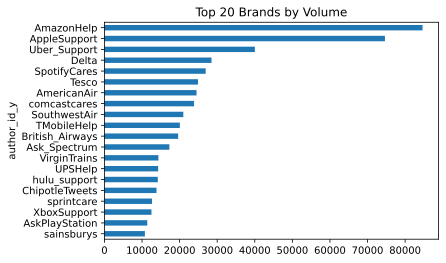

In [ ]:
inbounds_and_outbounds \
    .loc[inbounds_and_outbounds.author_id_y.isin(top_support_providers)] \
    .groupby('author_id_y') \
    .tweet_id_x.count() \
    .sort_values() \
    .plot.barh(title='Top 20 Brands by Volume')

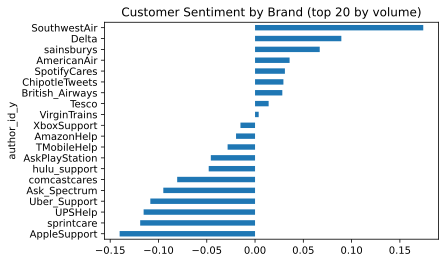

In [ ]:
inbounds_and_outbounds \
    .loc[inbounds_and_outbounds.author_id_y.isin(top_support_providers)] \
    .groupby('author_id_y') \
    .inbound_sentiment.mean() \
    .sort_values() \
    .plot.barh(title='Customer Sentiment by Brand (top 20 by volume)')

In [ ]:
inbounds_and_outbounds['created_at_x'] = pd.to_datetime(inbounds_and_outbounds.created_at_x)
temp_series = pd.DatetimeIndex(inbounds_and_outbounds['created_at_x'], tz=None)

In [ ]:
temp_series.tz_localize(None)
# inbounds_and_outbounds['created_at_x'] = inbounds_and_outbounds['created_at_x'].tz_localize(None)

DatetimeIndex(['2017-10-31 21:45:10', '2017-10-31 21:45:10',
               '2017-10-31 21:45:10', '2017-10-31 19:56:01',
               '2017-10-31 22:03:34', '2017-10-31 22:01:35',
               '2017-10-31 22:06:54', '2017-10-31 22:06:56',
               '2017-10-31 22:10:46', '2017-10-31 22:12:16',
               ...
               '2017-11-29 19:24:29', '2017-11-30 01:41:28',
               '2017-11-30 01:40:49', '2017-11-30 01:39:12',
               '2017-11-22 07:41:45', '2017-11-22 07:30:39',
               '2017-11-22 07:43:36', '2017-11-22 08:25:48',
               '2017-11-22 08:35:16', '2017-11-21 22:01:04'],
              dtype='datetime64[ns]', name='created_at_x', length=794299, freq=None)

In [ ]:
inbounds_and_outbounds['created_at_x'] = temp_series

In [ ]:
temp_series.tzinfo

<UTC>

#### Apple

In [ ]:
import pytz
print(datetime(2017, 10, 7).replace(tzinfo=pytz.utc).tzinfo)

UTC


In [ ]:
apple_tweets = inbounds_and_outbounds \
    .loc[inbounds_and_outbounds.author_id_y == 'AppleSupport'] \
    .loc[inbounds_and_outbounds.created_at_x > datetime(2017, 10, 7).replace(tzinfo=pytz.utc)]

Text(0, 0.5, 'Customer Sentiment')

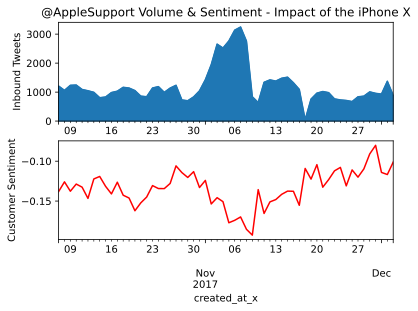

In [ ]:
plt.subplot(2, 1, 1)

ax = apple_tweets \
    .groupby(pd.Grouper(key='created_at_x', freq='24h')) \
    .count() \
    .tweet_id_x.sort_index() \
    .plot(title='@AppleSupport Volume & Sentiment - Impact of the iPhone X', kind='area')
ax.set_ylabel('Inbound Tweets')
    

plt.subplot(2, 1, 2)
ax = apple_tweets \
    .groupby(pd.Grouper(key='created_at_x', freq='24h')) \
    .inbound_sentiment.mean() \
    .sort_index() \
    .plot(color='red')
ax.set_ylabel('Customer Sentiment')

#### Amazon

In [ ]:
amazon_tweets = inbounds_and_outbounds \
    .loc[inbounds_and_outbounds.author_id_y == 'AmazonHelp'] \
    .loc[inbounds_and_outbounds.created_at_x > datetime(2017, 10, 1).replace(tzinfo=pytz.utc)]

Text(0, 0.5, 'Customer Sentiment')

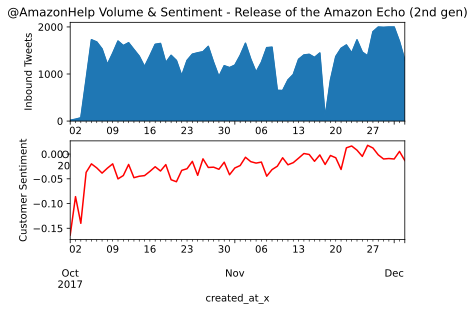

In [ ]:
plt.subplot(2, 1, 1)

ax = amazon_tweets \
    .groupby(pd.Grouper(key='created_at_x', freq='24h')) \
    .count() \
    .tweet_id_x.sort_index() \
    .plot(title='@AmazonHelp Volume & Sentiment - Release of the Amazon Echo (2nd gen)', kind='area')
ax.set_ylabel('Inbound Tweets')
    

plt.subplot(2, 1, 2)
ax = amazon_tweets \
    .groupby(pd.Grouper(key='created_at_x', freq='24h')) \
    .inbound_sentiment.mean() \
    .sort_index() \
    .plot(color='red')
ax.set_ylabel('Customer Sentiment')

#### American Airlines

In [ ]:
amr_air_tweets = inbounds_and_outbounds \
    .loc[inbounds_and_outbounds.author_id_y == 'AmericanAir'] \
    .loc[inbounds_and_outbounds.created_at_x > datetime(2017, 4, 25).replace(tzinfo=pytz.utc)]

Text(0, 0.5, 'Customer Sentiment')

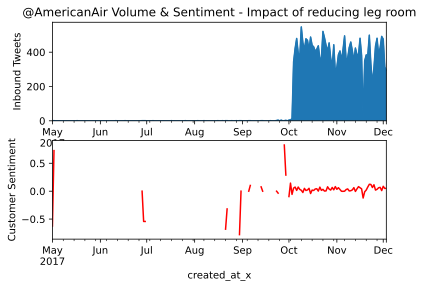

In [ ]:
plt.subplot(2, 1, 1)

ax = amr_air_tweets \
    .groupby(pd.Grouper(key='created_at_x', freq='24h')) \
    .count() \
    .tweet_id_x.sort_index() \
    .plot(title='@AmericanAir Volume & Sentiment - Impact of reducing leg room', kind='area')
ax.set_ylabel('Inbound Tweets')
    

plt.subplot(2, 1, 2)
ax = amr_air_tweets \
    .groupby(pd.Grouper(key='created_at_x', freq='24h')) \
    .inbound_sentiment.mean() \
    .sort_index() \
    .plot(color='red')
ax.set_ylabel('Customer Sentiment')

#### Uber

In [ ]:
uber_tweets = inbounds_and_outbounds \
    .loc[inbounds_and_outbounds.author_id_y == 'Uber_Support'] \
    .loc[inbounds_and_outbounds.created_at_x > datetime(2017, 10, 1).replace(tzinfo=pytz.utc)]

Text(0, 0.5, 'Customer Sentiment')

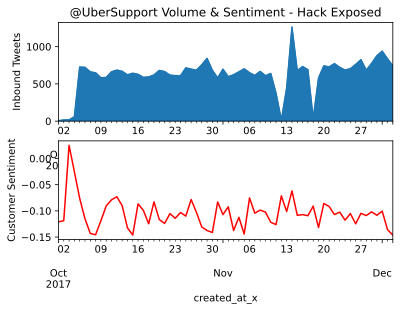

In [ ]:
plt.subplot(2, 1, 1)

ax = uber_tweets \
    .groupby(pd.Grouper(key='created_at_x', freq='24h')) \
    .count() \
    .tweet_id_x.sort_index() \
    .plot(title='@UberSupport Volume & Sentiment - Hack Exposed', kind='area')
ax.set_ylabel('Inbound Tweets')
    

plt.subplot(2, 1, 2)
ax = uber_tweets \
    .groupby(pd.Grouper(key='created_at_x', freq='24h')) \
    .inbound_sentiment.mean() \
    .sort_index() \
    .plot(color='red')
ax.set_ylabel('Customer Sentiment')